In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [18]:
X, y = make_regression(n_samples= 200, n_features= 1, n_informative=2, n_targets=1, noise= 20)

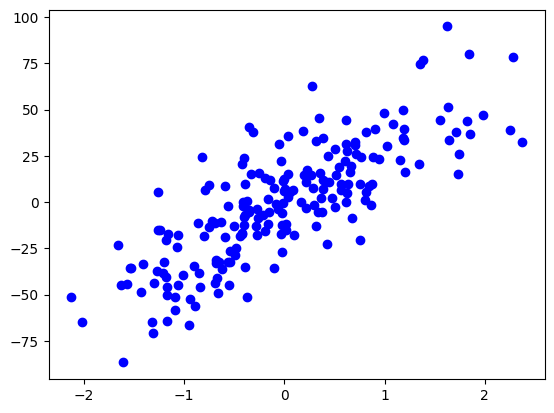

In [21]:
plt.scatter(X[:, 0], y, color='blue', label='Feature 1')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)


In [39]:
from sklearn.metrics import r2_score
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

R^2 Score: 0.70


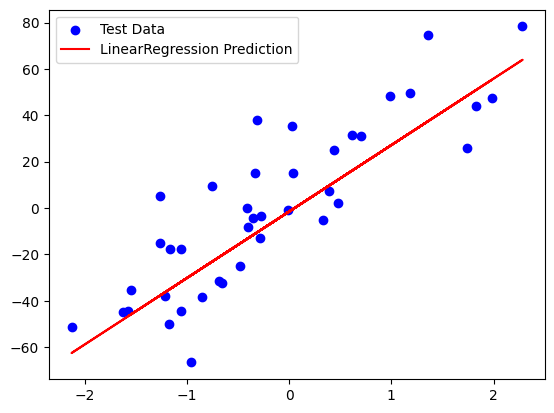

In [44]:
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='LinearRegression Prediction')
plt.legend()

In [24]:
reg.coef_, reg.intercept_

(array([28.68762711]), np.float64(-1.5734625597291048))

## implementing the customized gradient descent class

In [25]:
class MyGDRegressor:
    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = 100
        self.intercept_ = 0

    def fit(self, X, Y):
        for i in range(self.epochs):
            coef_loss = -2 * np.sum(X.ravel() * (Y - self.coef_ * X.ravel() - self.intercept_))
            intercept_loss = -2 * np.sum(Y - self.coef_ * X.ravel() - self.intercept_)

            self.coef_ -= self.learning_rate * coef_loss
            self.intercept_ -= self.learning_rate * intercept_loss

    def predict(self, X):
        return self.coef_ * X + self.intercept_

In [26]:
X_train.shape, y_train.shape

((160, 1), (160,))

In [35]:
my_reg = MyGDRegressor(learning_rate=0.001, epochs=100)
my_reg.fit(X_train, y_train)

In [40]:
y_pred = my_reg.predict(X_test)
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

R^2 Score: 0.70


In [36]:
my_reg.coef_, my_reg.intercept_

(np.float64(28.687627106476327), np.float64(-1.5734625597575875))

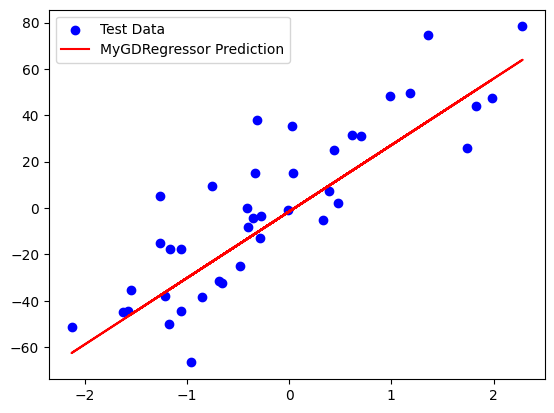

In [43]:
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='MyGDRegressor Prediction')
plt.legend()